# Notebook for EDA and building dataset for hypothesis test, regression

In [1]:
import pandas as pd
netflix_data=pd.read_csv(r'D:\Fall\Web data analytics\Project ideas\Netflix datasets\Original Datasets\netflix_dataset.csv')
netflix_original=pd.read_csv(r'D:\Fall\Web data analytics\Project ideas\Netflix datasets\Original Datasets\All Netflix Originals.csv')

In [2]:
# Adding the year and quarter
netflix_data['date_added']=netflix_data['date_added'].astype('datetime64[ns]')
netflix_data['date_added_year']=netflix_data['date_added'].dt.year
netflix_data['Quarter']=netflix_data['date_added'].dt.quarter
netflix_data['title']=netflix_data['title'].apply(lambda x:x.lower())

In [3]:
# Changing column name
#netflix_original=netflix_original.rename(columns={'Title':'title'})
netflix_original=netflix_original.drop_duplicates(subset='Title',keep=False)
netflix_original['Is_Original']=1
netflix_original['Title']=netflix_original['Title'].apply(lambda x:x.lower())

In [4]:
# combining to get orignal flag
import numpy as np
overall_data=pd.merge(netflix_data,netflix_original,how='left',left_on='title',right_on='Title')
overall_data['Is_Original']=overall_data['Is_Original'].fillna(0)

In [5]:
overall_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Is_Original
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,https://www.imdb.com/title/tt11394180/,movie,7.4,89.0,2020.0,"Documentary, Biography, Drama",6747.0,2020-01-25,Kirsten Johnson,1.0
1,s2,TV Show,blood & water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,https://www.imdb.com/title/tt9839146/,tvSeries,6.7,53.0,2020.0,"Drama, Mystery",3388.0,2020-05-20,NaN,1.0
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,https://www.imdb.com/title/tt15320436/,tvSeries,6.7,NaN,2021.0,"Documentary, Reality-TV",240.0,2021-09-24,NaN,1.0
4,s5,TV Show,kota factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,https://www.imdb.com/title/tt9432978/,tvSeries,9.1,45.0,2019.0,"Comedy, Drama",72254.0,2019-04-16,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8803,s8804,TV Show,zombie dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8804,s8805,Movie,zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8805,s8806,Movie,zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# Summary and Analysis of Netflix Library 

In [6]:
import matplotlib.pyplot as plt

In [7]:
# split of movie and tv shows
a=overall_data.groupby('type').size().reset_index()
a=a.rename(columns={'type':'Content','0':'Overall Count'})
a

,Content,0
0,Movie,6131
1,TV Show,2676


In [8]:
# % of original content
overall_data['Is_Original'].value_counts(normalize=True).reset_index()

,index,Is_Original
0,0.0,0.826275
1,1.0,0.173725


In [9]:
# % of original across types
types_data=overall_data[['Is_Original','type']].value_counts().reset_index()
types_data.pivot(index='type',columns='Is_Original',values=0)

Is_Original,0.0,1.0
type,,
Movie,5374,757
TV Show,1903,773


In [43]:
# Duration of TV shows
shows=overall_data[overall_data['type']=='TV Show']
shows['duration']=shows['duration'].astype('str')
duration_show=[]
for item in shows['duration']:
    a=item.replace('Seasons','')
    a=a.replace('Season','')
    duration_show.append(a)
temp=pd.DataFrame(duration_show,columns=['duration'])
temp['duration']=temp['duration'].astype('float')
pd.DataFrame(temp['duration'].value_counts())

<ipython-input-43-89ad328210e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows['duration']=shows['duration'].astype('str')


,duration
1.0,1793
2.0,425
3.0,199
4.0,95
5.0,65
6.0,33
7.0,23
8.0,17
9.0,9
10.0,7


In [45]:
# duration of original tv shows
shows_original=overall_data[(overall_data['type']=='TV Show') & (overall_data['Is_Original']==0)]
shows_original['duration']=shows_original['duration'].astype('str')
duration_show_orig=[]
for item in shows_original['duration']:
    a=item.replace('Seasons','')
    a=a.replace('Season','')
    b=item
    duration_show_orig.append(a)
temp=pd.DataFrame(duration_show_orig,columns=['duration'])
temp['duration']=temp['duration'].astype('float')
pd.DataFrame(temp['duration'].value_counts())

<ipython-input-45-9ef685be5292>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shows_original['duration']=shows_original['duration'].astype('str')


,duration
1.0,1299
2.0,283
3.0,127
4.0,62
5.0,52
6.0,22
7.0,20
8.0,14
9.0,9
10.0,7


## Data for T-test to identify rating difference for tv shows with 1 season vs more than 1

In [12]:
# reading tv shows data to get rotten tomatoes score
tv_shows_netflix=pd.read_csv(r'D:\Fall\Web data analytics\Project ideas\Netflix datasets\Original Datasets\tv_shows.csv')
tv_shows_netflix['Title']=tv_shows_netflix['Title'].apply(lambda x:x.lower())
tv_shows_netflix_seasons=pd.merge(tv_shows_netflix,overall_data,how='left',left_on='Title',right_on='title')

In [13]:
tv_shows_netflix_seasons=tv_shows_netflix_seasons[['Title_x','Rotten Tomatoes','duration']]
rotten_tomatoes_proper=[]
for item in tv_shows_netflix_seasons['Rotten Tomatoes']:
    new_lis=item.split('/')
    rotten_tomatoes_proper.append(float(new_lis[0]))
tv_shows_netflix_seasons['Rotten_Tomatoes_Proper']=rotten_tomatoes_proper
#tv_flows_netflix_seasons=tv_shows_netflix_seasons[tv_shows_netflix_seasons['duration'].notnull()]

In [14]:
tv_flows_netflix_seasons_proper=tv_shows_netflix_seasons[tv_shows_netflix_seasons['duration'].isna()==False]

In [15]:
one_season_flag=[]
for item in tv_flows_netflix_seasons_proper['duration']:
    if (('1 Season' in item) | ('min' in item)):
        one_season_flag.append('1')
    else:
        one_season_flag.append('0')
tv_flows_netflix_seasons_proper['One season']=one_season_flag

<ipython-input-15-1fdd6987f0aa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_flows_netflix_seasons_proper['One season']=one_season_flag


In [16]:
tv_flows_netflix_seasons_proper.to_csv('seasons_distribution.csv')

# Data for Competitor Comparison

In [17]:
# reading dataset that contains tv shows distribution among competitors
tv_shows_differentplat=pd.read_csv(r'D:\Fall\Web data analytics\Project ideas\Netflix datasets\Original Datasets\tv_shows.csv')
rotten_tomatoes_proper=[]
for item in tv_shows_differentplat['Rotten Tomatoes']:
    new_lis=item.split('/')
    rotten_tomatoes_proper.append(float(new_lis[0]))
tv_shows_differentplat['Rotten_Tomatoes_Proper']=rotten_tomatoes_proper

# tv shows
tv_shows_differentplat=tv_shows_differentplat.drop(columns=['Unnamed: 0', 'ID'])
tv_shows_differentplat['num_platforms']=tv_shows_differentplat['Hulu']+tv_shows_differentplat['Prime Video']+tv_shows_differentplat['Disney+']

tv_shows_differentplat['Just Netflix']=np.where((tv_shows_differentplat['Netflix']==1) & (tv_shows_differentplat['num_platforms']==0),1,0)
tv_shows_exclusive=tv_shows_differentplat[(tv_shows_differentplat['Netflix']==1) & (tv_shows_differentplat['num_platforms']==0)]
tv_shows_otherplatforms=tv_shows_differentplat[(tv_shows_differentplat['Netflix']==0) & (tv_shows_differentplat['num_platforms']>0)]

In [18]:
netflix_shows=tv_shows_differentplat[tv_shows_differentplat['Netflix']==1]
netflix_commonshows=netflix_shows[netflix_shows['num_platforms']>0]
len(netflix_commonshows)/len(netflix_shows)

0.106544901065449

In [19]:
tv_shows_differentplat.to_csv('Competitor_Data.csv')

## Rotten tomatoes rating for all movies and tv shows

In [20]:
ratings=pd.read_csv('final_netflix.csv')
ratings['title']=ratings['title'].apply(lambda x:x.lower())

In [21]:
ratings['show_num']=ratings['Unnamed: 0']+1
ratings['show_id']='s'+ratings['show_num'].astype('str')

In [22]:
ratings_quarterly=pd.merge(overall_data,ratings,on='show_id',how='left')

In [23]:
# removing ratings which are not present
dist_audience=ratings_quarterly[ratings_quarterly['audience_score']!=-2]
dist_critic=ratings_quarterly[ratings_quarterly['tomato_score']!=-2]

count    5934.000000
mean       36.483485
std        39.583820
min        -1.000000
25%        -1.000000
50%        22.000000
75%        79.000000
max       100.000000
Name: tomato_score, dtype: float64


<AxesSubplot:>

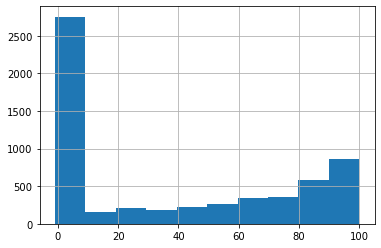

In [24]:
print(dist_critic['tomato_score'].describe())
dist_critic['tomato_score'].hist()

count    5934.000000
mean       50.921638
std        32.085972
min        -1.000000
25%        27.000000
50%        58.000000
75%        78.000000
max       100.000000
Name: audience_score, dtype: float64


<AxesSubplot:>

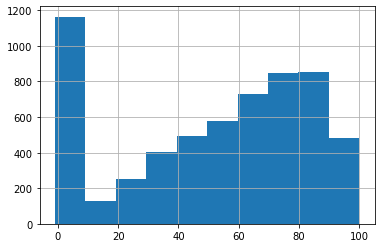

In [25]:
print(dist_audience['audience_score'].describe())
dist_audience['audience_score'].hist()

# Building dataset needed for regression

## Obtaining Tomato Rating Across Years and Quarters

In [26]:
# filtering for tv shows
ratings_quarterly_tv=ratings_quarterly[(ratings_quarterly['type_x']=='TV Show')] 
ratings_quarterly_tv=ratings_quarterly_tv[(ratings_quarterly_tv['audience_score']!=-1) & (ratings_quarterly_tv['audience_score']!=-2)]
ratings_quarterly_tv=ratings_quarterly_tv[(ratings_quarterly_tv['tomato_score']!=-1)]          

quarterly_rating_summary_tv=ratings_quarterly_tv.groupby(['date_added_year','Quarter'])['audience_score','tomato_score'].median().reset_index()

<ipython-input-26-6cafa0bfcd1e>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  quarterly_rating_summary_tv=ratings_quarterly_tv.groupby(['date_added_year','Quarter'])['audience_score','tomato_score'].median().reset_index()


In [27]:
# filtering for movies
ratings_quarterly_movies=ratings_quarterly[(ratings_quarterly['type_x']=='Movie')] 
ratings_quarterly_movies=ratings_quarterly_movies[(ratings_quarterly_movies['tomato_score']!=-1) & (ratings_quarterly_movies['tomato_score']!=-2)]
ratings_quarterly_movies=ratings_quarterly_movies[(ratings_quarterly_movies['audience_score']!=-1) & (ratings_quarterly_movies['audience_score']!=2)]                                       
quarterly_rating_summary_movies=ratings_quarterly_movies.groupby(['date_added_year','Quarter'])['audience_score','tomato_score'].median().reset_index()

<ipython-input-27-fa870ccf7341>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  quarterly_rating_summary_movies=ratings_quarterly_movies.groupby(['date_added_year','Quarter'])['audience_score','tomato_score'].median().reset_index()


In [28]:
# Changing Datatypes for tv shows
quarterly_rating_summary_tv['Quarter']=quarterly_rating_summary_tv['Quarter'].astype('int')
quarterly_rating_summary_tv['date_added_year']=quarterly_rating_summary_tv['date_added_year'].astype('int')
quarterly_rating_summary_tv['Quarter']="Q"+quarterly_rating_summary_tv['Quarter'].astype('str')
quarterly_rating_summary_tv=quarterly_rating_summary_tv.rename(columns={'tomato_score':'tomato_score_tv','audience_score':'audience_score_tv'})
quarterly_rating_summary_tv=quarterly_rating_summary_tv.rename(columns={'date_added_year':'Year'})

In [29]:
# Changing Datatypes for movies
quarterly_rating_summary_movies['Quarter']=quarterly_rating_summary_movies['Quarter'].astype('int')
quarterly_rating_summary_movies['date_added_year']=quarterly_rating_summary_movies['date_added_year'].astype('int')
quarterly_rating_summary_movies['Quarter']="Q"+quarterly_rating_summary_movies['Quarter'].astype('str')
quarterly_rating_summary_movies=quarterly_rating_summary_movies.rename(columns={'tomato_score':'tomato_score_movies','audience_score':'audience_score_movies'})
quarterly_rating_summary_movies=quarterly_rating_summary_movies.rename(columns={'date_added_year':'Year'})

## Building subscriber, no of movies, tv shows data at quarter, year level

In [30]:
#obtaining the subscriber data
subscriber_data=pd.read_excel(r'D:\Fall\Web data analytics\Project ideas\Netflix datasets\Original Datasets\Subscriber Data.xlsx')

In [31]:
dataset_timelevel=overall_data[['Quarter','date_added_year','show_id','type','Is_Original']]
dataset_timelevel['Quarter_Year']="Q"+dataset_timelevel['Quarter'].astype('str')+'-'+dataset_timelevel['date_added_year'].astype('str')
timelevel_final=dataset_timelevel.groupby(['Quarter','date_added_year','type','Is_Original'])['show_id'].size().reset_index()
temp_data=timelevel_final.pivot(index=['date_added_year','Quarter'],columns=['type','Is_Original'],values='show_id').reset_index().fillna(0)
temp_data.columns = ['date_added_year','Quarter','Movie Not Original','TVShow Not Original','Movie Original','TV Original']
temp_data['Quarter']=temp_data['Quarter'].astype('int')
temp_data['date_added_year']=temp_data['date_added_year'].astype('int')
temp_data['Quarter']="Q"+temp_data['Quarter'].astype('str')
temp_data=temp_data.rename(columns={'date_added_year':'Year'})
final_dataset=pd.merge(subscriber_data,temp_data,left_on=['Quarter ','Year'],right_on=['Quarter','Year'],how='left').fillna(0)
final_dataset=final_dataset[['Quarter ','Year','Date','Number of Subscribers','Movie Not Original','TVShow Not Original','Movie Original','TV Original']]
final_dataset['Overall_Movies']=final_dataset['Movie Not Original']+final_dataset['Movie Original']
final_dataset['Overall TV Shows']=final_dataset['TVShow Not Original']+final_dataset['TV Original']

<ipython-input-31-15475cb1ad80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_timelevel['Quarter_Year']="Q"+dataset_timelevel['Quarter'].astype('str')+'-'+dataset_timelevel['date_added_year'].astype('str')


In [32]:
final_dataset_ratings=pd.merge(final_dataset,quarterly_rating_summary_tv,left_on=['Quarter ','Year'],right_on=['Quarter','Year'],how='left').fillna(0)
final_dataset_ratings=final_dataset_ratings[['Quarter ','Year','Date','Number of Subscribers','Movie Not Original','TVShow Not Original','Movie Original','TV Original','Overall_Movies','Overall TV Shows','audience_score_tv','tomato_score_tv']]
final_dataset_ratings=pd.merge(final_dataset_ratings,quarterly_rating_summary_movies,left_on=['Quarter ','Year'],right_on=['Quarter','Year'],how='left').fillna(0)
final_dataset_ratings=final_dataset_ratings[['Quarter ','Year','Date','Number of Subscribers','Movie Not Original','TVShow Not Original','Movie Original','TV Original','Overall_Movies','Overall TV Shows','audience_score_tv','tomato_score_tv','audience_score_movies','tomato_score_movies']]

## Adding customer sentiment information

In [33]:
customer_sent=pd.read_excel('Final Sent.xlsx',sheet_name='Sentiment vs Titles')

In [ ]:
customer_sent.info()

In [34]:
customer_sent['Content']=customer_sent['Content'].astype('str')
customer_sent['Content']=customer_sent['Content'].apply(lambda x:x.lower())
customer_sent=customer_sent.drop_duplicates(subset='Content',keep=False)
cust_merge_data=pd.merge(overall_data,customer_sent,left_on='title',right_on='Content',how='left')
cust_merge_data=cust_merge_data[cust_merge_data['Average of Compounded Review Score'].isna()==False]
cust_merge_data=cust_merge_data.groupby(['date_added_year','Quarter'])['Average of Compounded Review Score'].median().reset_index()

In [35]:
# Changing Datatypes for customer sentiment
cust_merge_data['Quarter']=cust_merge_data['Quarter'].astype('int')
cust_merge_data['date_added_year']=cust_merge_data['date_added_year'].astype('int')
cust_merge_data['Quarter']="Q"+cust_merge_data['Quarter'].astype('str')
cust_merge_data=cust_merge_data.rename(columns={'date_added_year':'Year'})

In [36]:
final_dataset_final=pd.merge(final_dataset_ratings,cust_merge_data,left_on=['Quarter ','Year'],right_on=['Quarter','Year'],how='left').fillna(0)

In [37]:
final_dataset_final=final_dataset_final[['Quarter ','Year','Date','Number of Subscribers','Movie Not Original','TVShow Not Original','Movie Original','TV Original','Overall_Movies','Overall TV Shows','audience_score_tv','tomato_score_tv','audience_score_movies','tomato_score_movies','Average of Compounded Review Score']]

In [ ]:
final_dataset_final

In [38]:
final_dataset_final.to_csv('regression_dataset.csv')